# MS&E 226: Small Data, Project 1

## Exploratory data analysis Zillow's Challenge 

## 1. Import libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## 2. Loading and preparation of train-dev datasets  

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
transactions_df = pd.read_csv("../datasets_stanford/train_2016_v2.csv", parse_dates=["transactiondate"])
properties_df = pd.read_csv("../datasets_stanford/properties_2016.csv")

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print("The dimensions of the transactions dataset are: ", transactions_df.shape)
print("The dimensions of the properties dataset are: ", properties_df.shape)

The dimensions of the transactions dataset are:  (90275, 3)
The dimensions of the properties dataset are:  (2985217, 58)


Some samples of the two dataframes

In [5]:
transactions_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
properties_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


We can observe how some features/covariates have many NaN values. We will need to quantify later how many. 

In [7]:
# Merge dataframes to create one dataframe with all the data
entire_dataset_df = pd.merge(transactions_df, properties_df, on='parcelid', how='left')
entire_dataset_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [8]:
# Create a dataframe with all the covariates
dataset_examples_df = entire_dataset_df.copy(deep = True)
del dataset_examples_df["logerror"]
dataset_examples_df.head()

,parcelid,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [9]:
dataset_labels_df = entire_dataset_df["logerror"]
dataset_labels_df = dataset_labels_df.to_frame()

In [10]:
dataset_labels_df.head()

,logerror
0,0.0276
1,-0.1684
2,-0.0040
3,0.0218
4,-0.0050


In [12]:
# Create Training-Test data (80-20% splits)
X_train, X_test, y_train, y_test = train_test_split(dataset_examples_df, dataset_labels_df, test_size=0.2, random_state=42)

Print dimensions of the Train-Test Split

In [13]:
y_train.shape

(72220, 1)

In [14]:
y_test.shape

(18055, 1)

In [15]:
X_train.shape

(72220, 59)

In [16]:
X_test.shape

(18055, 59)

## 3. Exploratory Data Analysis

#### a) Distribution Logerrors 

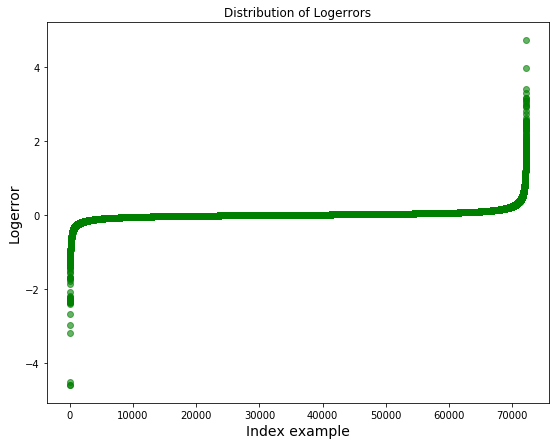

In [55]:
plt.figure(num = 1, figsize=(9,7))
plt.scatter(range(X_train.shape[0]), np.sort(y_train.logerror.values), c = "green", alpha = 0.6)
plt.xlabel('Index example', fontsize=14)
plt.ylabel('Logerror', fontsize=14)
plt.title("Distribution of Logerrors")
plt.show()

It looks like there are not many outliers in the response variable!

### b) Volume of transactions per month 

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


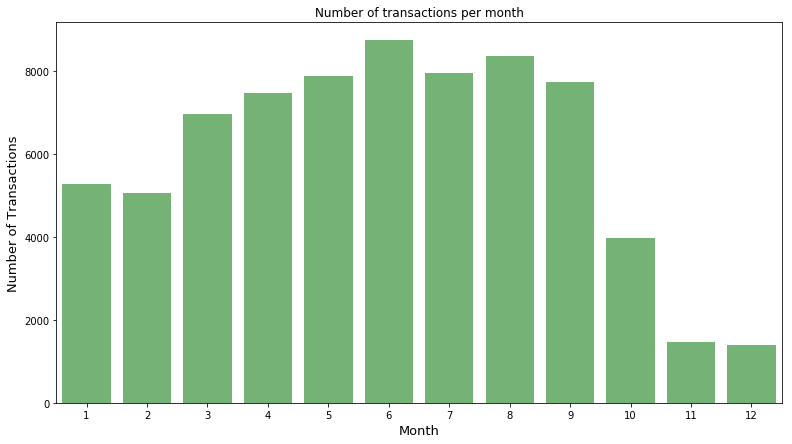

In [36]:
# Extract month from dates
X_train['transaction_month'] = X_train['transactiondate'].dt.month

count_transactions_month = X_train['transaction_month'].value_counts()
plt.figure(num = 2, figsize=(13,7))
sns.barplot(count_transactions_month.index, count_transactions_month.values, alpha=0.7, color=color[2])
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Transactions', fontsize=13)
plt.title("Number of transactions per month")
plt.show()

The number of transactions has been around 4000 and 8000 during the first 9 months of the year. 

### c) Number of missing values per feature 

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


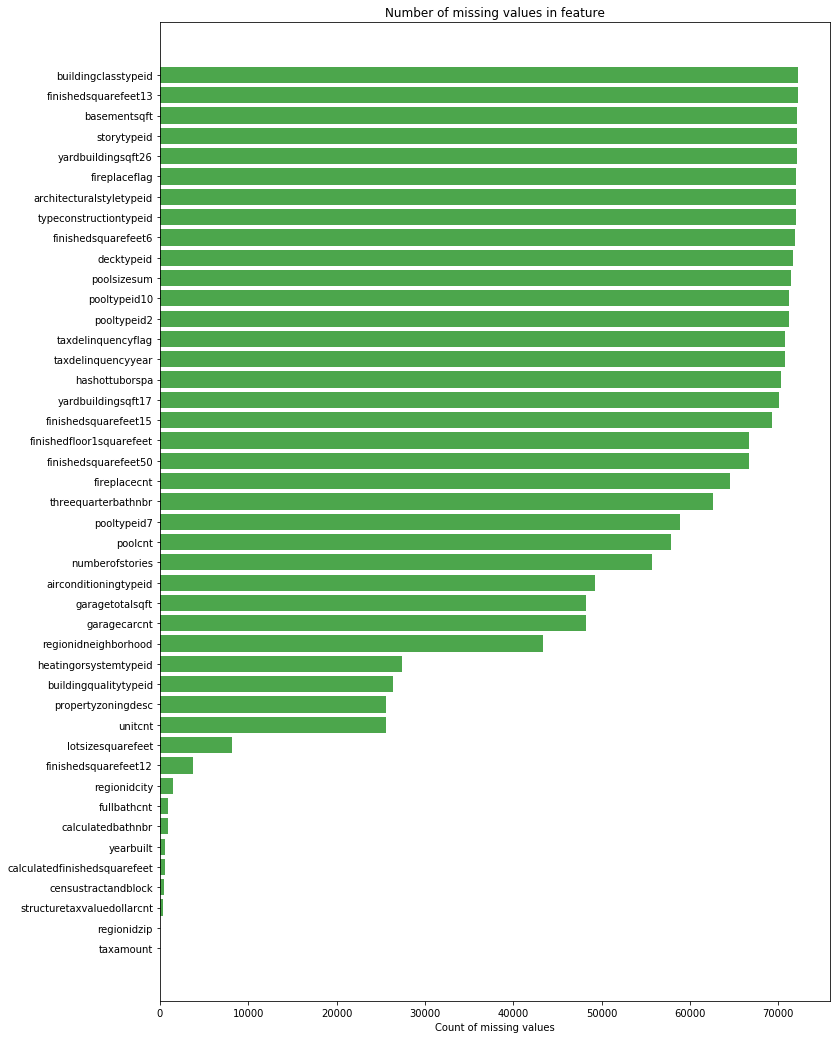

In [43]:
missing_values_df = X_train.isnull().sum(axis=0).reset_index()

missing_values_df.columns = ['column_name', 'missing_count']
missing_values_df = missing_values_df.ix[missing_values_df['missing_count']>0]
missing_values_df = missing_values_df.sort_values(by='missing_count')

ind = np.arange(missing_values_df.shape[0])
width = 0.8
fig, ax = plt.subplots(num = 3, figsize=(10,18))
rects = ax.barh(ind, missing_values_df.missing_count.values, color='green', alpha=0.7)
ax.set_yticks(ind)
ax.set_yticklabels(missing_values_df.column_name.values, rotation='vertical')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in feature")
plt.show()


### d) Datatypes of the covariates

In [46]:
datatype_df = X_train.dtypes.reset_index()
datatype_df.columns = ["Count", "Feature Type"]
datatype_df.groupby("Feature Type").aggregate('count').reset_index()

,Feature Type,Count
0,int64,2
1,datetime64[ns],1
2,float64,52
3,object,5


### e) Correlation analysis between the covariates and the response variable 

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


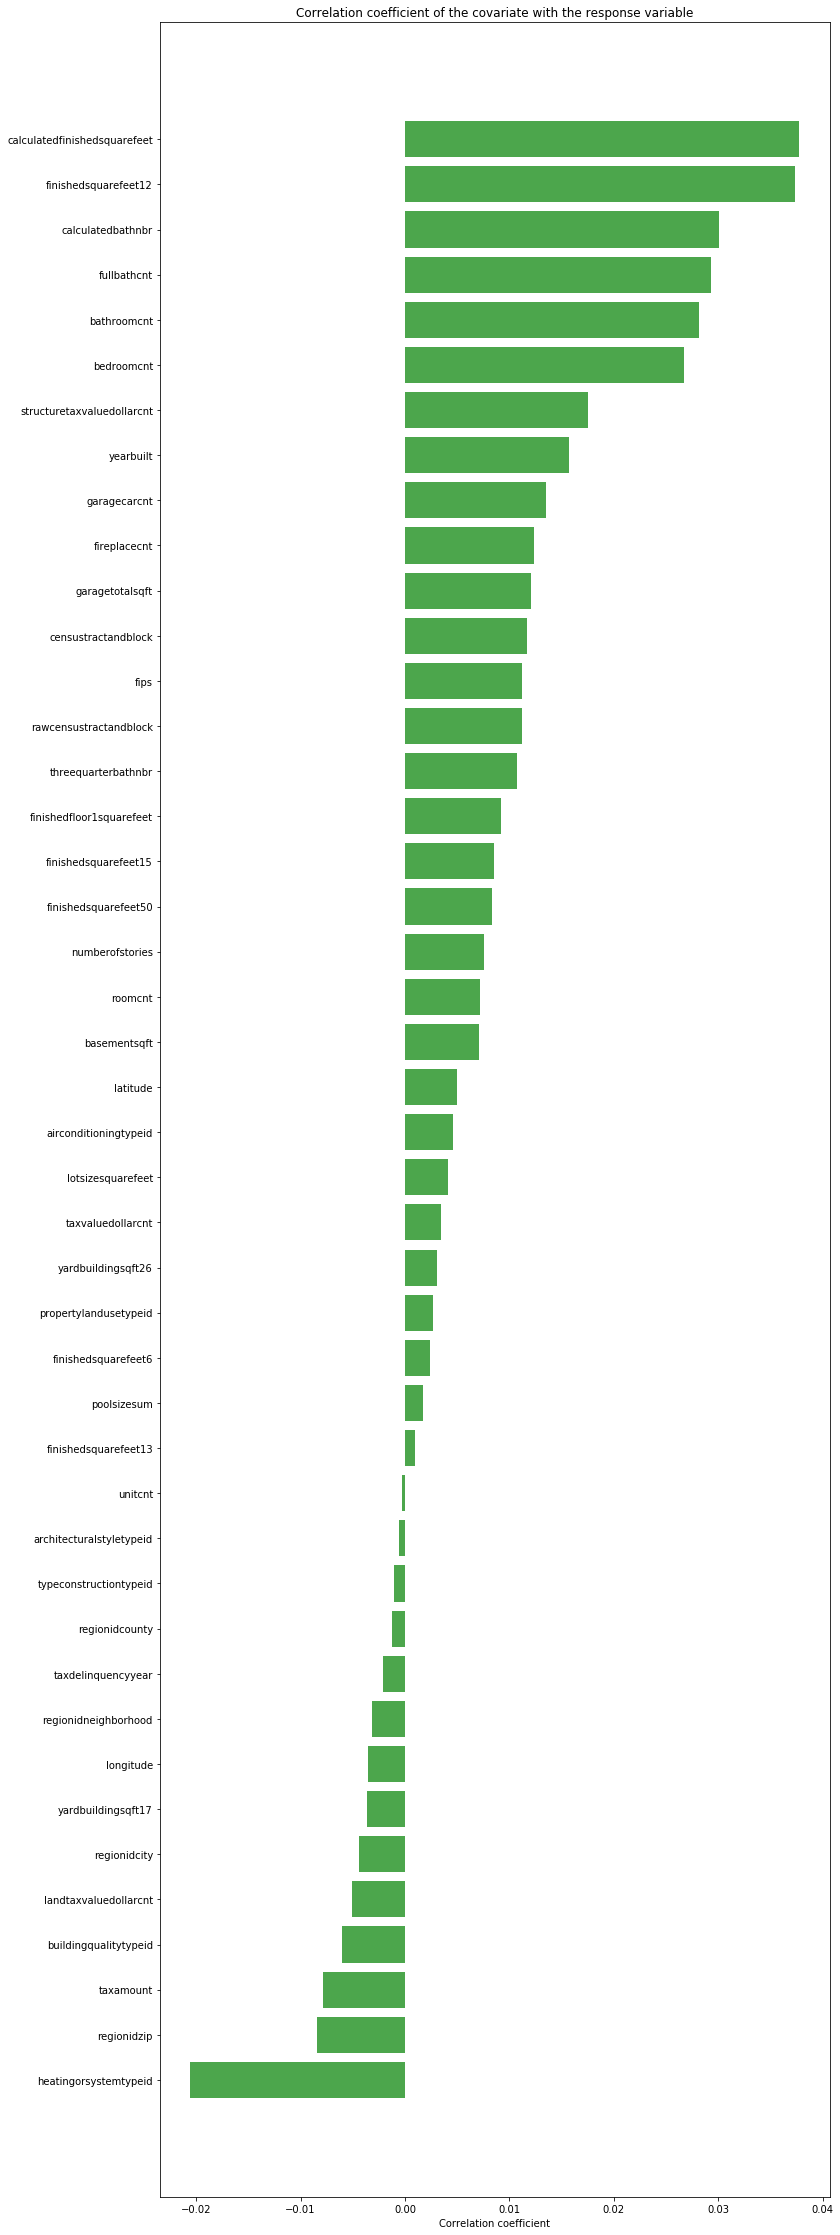

In [57]:
# Fill missing values with the mean of each column
mean_values = X_train.mean(axis=0)
X_train_without_na = X_train.fillna(mean_values, inplace=True)

# Compute correlation coefficient
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
x_cols = [col for col in X_train_without_na.columns if col not in ['logerror'] if X_train_without_na[col].dtype=='float64' and col not in corr_zero_cols]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(X_train_without_na[col].values, y_train.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
index = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(index, np.array(corr_df.corr_values.values), color='green', alpha = 0.7)
ax.set_yticks(index)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the covariate with the response variable")
plt.show()

Covariates don't seem to have large correlations with the response variable. Let's analyze the correlation of the features most correlated with the response variable between themselves. 

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


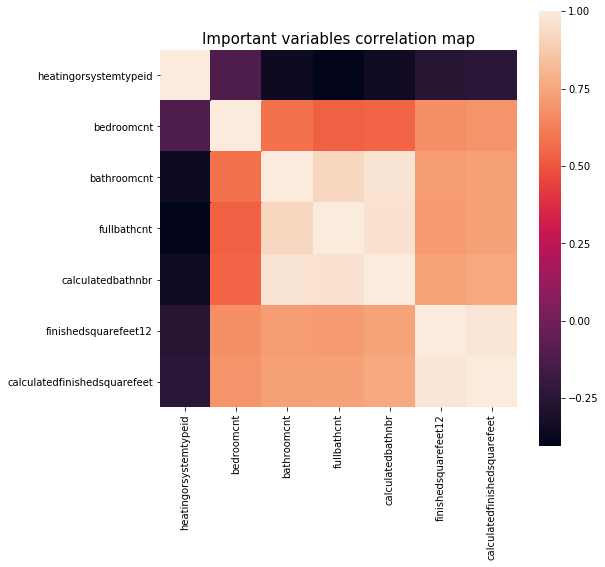

In [58]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]

cols_to_use = corr_df_sel.col_labels.tolist()

target_features_df = X_train_without_na[cols_to_use]
corrmat = target_features_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()